Objectives

* Identify the input and output features
* Perform data preprocessing and EDA according to the encoded data description provided above (you need to map the categories to their corresponding classes).
* Understand the working of KNN algorithms and different distance metrics used.
* For different values of ‘k’ and random state; calculate the accuracy, precision, recall and f1-score.
* Identify the optimal ‘k’ value and build the model using the same.



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv(r"C:\Users\india\Downloads\data.csv", delimiter=';')

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.rename(columns = {'Nacionality':'Nationality'}, inplace = True)

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
for i in df.columns:
    print(i,df[i].unique())
    print("*" * 10)

Marital status [1 2 4 3 5 6]
**********
Application mode [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
**********
Application order [5 1 2 4 3 6 9 0]
**********
Course [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
**********
Daytime/evening attendance	 [1 0]
**********
Previous qualification [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
**********
Previous qualification (grade) [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 

* No null values in the dataset

In [7]:
num = df.select_dtypes(include='int64')

In [8]:
num = num.astype('int16')

## EDA

In [9]:
eda = df.copy()

In [10]:
eda

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [11]:
eda['Marital status'] = eda['Marital status'].replace([1, 2, 3, 4, 5, 6], ['single', 'married', 'widower', 'divorced', 'facto union', 'legally separated'])
eda['Daytime/evening attendance\t'] = eda['Daytime/evening attendance\t'].replace([1, 0], ['daytime', 'evening'])
eda['Educational special needs'] = eda['Educational special needs'].replace([1, 0], ['yes', 'no'])
eda['Debtor'] = eda['Debtor'].replace([1, 0], ['yes', 'no'])
eda['Tuition fees up to date'] = eda['Tuition fees up to date'].replace([1, 0], ['yes', 'no'])
eda['Gender'] = eda['Gender'].replace([1, 0], ['male', 'female'])
eda['Scholarship holder'] = eda['Scholarship holder'].replace([1, 0], ['yes', 'no'])

<Axes: ylabel='count'>

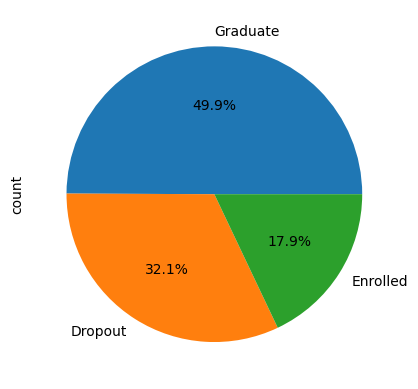

In [12]:
df['Target'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' )

* Above graph shows that the majority of the students are Graduated(49.9%) and the least is Enrolled which is 17.9%

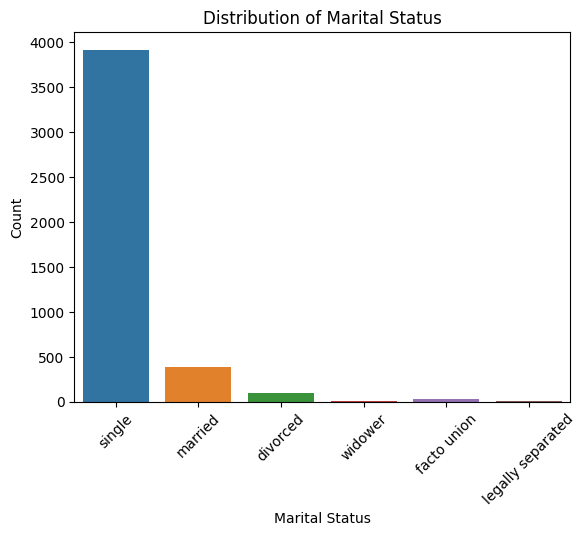

In [13]:
colors = sns.color_palette("husl")
sns.countplot(data=eda, x='Marital status', hue = 'Marital status')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Marital status'>

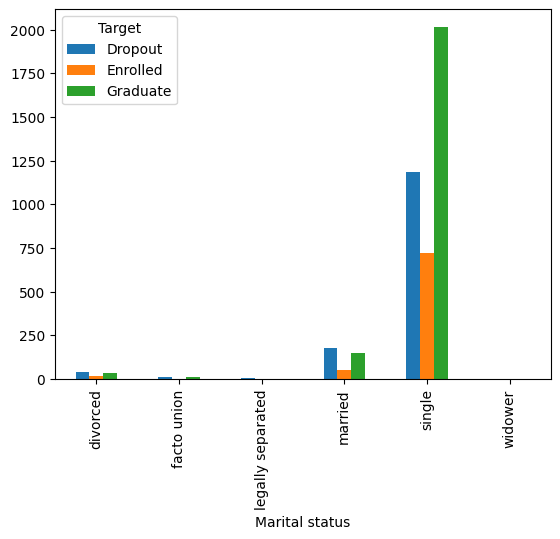

In [14]:
pd.crosstab(eda['Marital status'], eda['Target']).plot(kind = 'bar' )

* The dataset primarily comprises single students, with almost 3919 out of 4424 individuals falling into this category. This indicates that singles constitute the majority of the dataset.
* The least represented marital statuses in the dataset are married -379, divorced-91, widowed-25, living in a facto union -6 , and legally separated-4.
* Notably, among the single students, most of them are graduates, implying that educational attainment might play a role in their marital status.

In [15]:
def course(i):
    if i == 33:
        return 'Biofuel Production Technologies'
    if i == 171:
        return 'Animation and Multimedia Design'
    if i == 8014:
        return 'Social Service (evening attendance)'
    if i == 9003:
        return 'Agronomy'
    if i == 9070:
        return 'Communication Design'
    if i == 9085:
        return 'Veterinary Nursing'
    if i == 9119:
        return 'Informatics Engineering'
    if i == 9130:
        return 'Equinculture'
    if i == 9147:
        return 'Management'
    if i == 9238:
        return 'Social Service'
    if i == 9254:
        return 'Tourism'
    if i == 9500:
        return 'Nursing'
    if i == 9556:
        return 'Oral Hygiene'
    if i == 9670:
        return 'Advertising and Marketing Management'
    if i == 9773:
        return 'Journalism and Communication'
    if i == 9853:
        return 'Basic Education'
    if i == 9991:
        return 'Management (evening attendance)'
eda['Course'] = eda['Course'].apply(course)

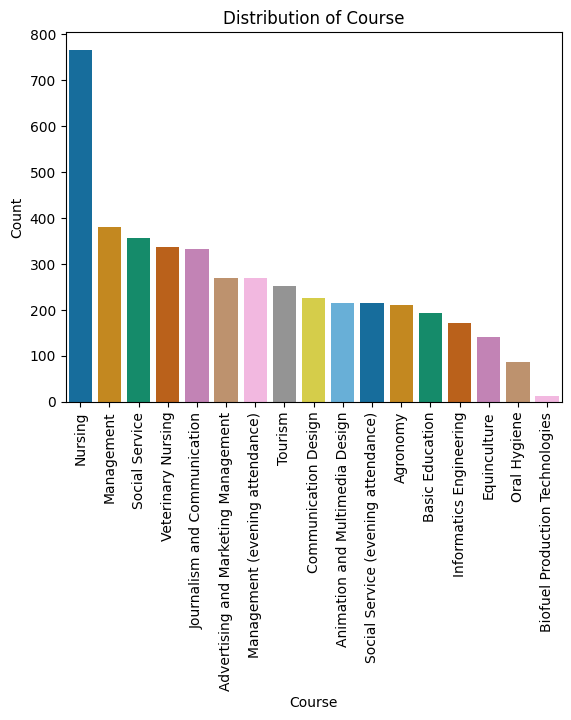

In [16]:
course = eda['Course'].value_counts()
sns.barplot(data=course, legend = False, palette="colorblind")
plt.title('Distribution of Course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [17]:
def application(i):
    if i == 1:
        return '1st phase - general contingent'
    elif i == 2:
        return 'Ordinance No. 612/93'
    elif i == 5:
        return '1st phase - special contingent (Azores Island)'
    elif i == 7:
        return 'Holders of other higher courses'
    elif i == 10:
        return 'Ordinance No. 854-B/99'
    elif i == 15:
        return 'International student (bachelor)'
    elif i == 16:
        return '1st phase - special contingent (Madeira Island)'
    elif i == 17:
        return '2nd phase - general contingent'
    elif i == 18:
        return '3rd phase - general contingent'
    elif i == 26:
        return 'Ordinance No. 533-A/99, item b2) (Different Plan)'
    elif i == 27:
        return 'Ordinance No. 533-A/99, item b3 (Other Institution)'
    elif i == 39:
        return 'Over 23 years old' 
    elif i == 42:
        return 'Transfer'
    elif i == 43:
        return 'Change of course'
    elif i == 44:
        return 'Technological specialization diploma holders'
    elif i == 51:
        return 'Change of institution/course'
    elif i == 53:
        return 'Short cycle diploma holders'
    elif i == 57:
        return 'Change of institution/course (International)'
    else:
        return 'Unknown'
eda['Application mode'] = eda['Application mode'].apply(application)

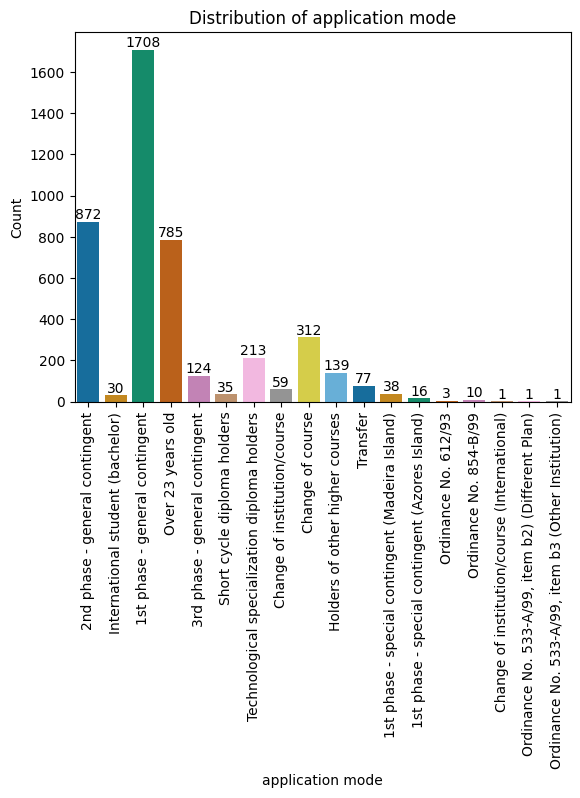

In [18]:
s = sns.countplot(data =eda , x= 'Application mode', hue = 'Application mode',legend = False, palette="colorblind")
for i in s.containers:
    s.bar_label(i)
plt.title('Distribution of application mode')
plt.xlabel('application mode')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<Axes: >

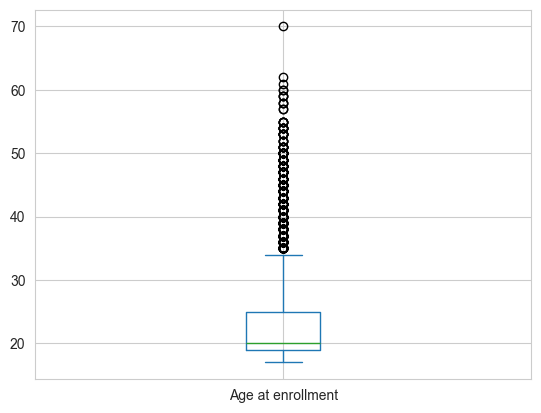

In [260]:
df['Age at enrollment'].plot(kind = 'box')

In [19]:
def previousclasification(i):
    if i == 1:
        return 'Secondary education'
    if i == 2:
        return '''Higher education - bachelor's degree'''
    if i == 3:
        return 'Higher education - degree'
    if i == 4:
        return '''Higher education - master's'''
    if i == 5:
        return 'Higher education - doctorate'
    if i == 6:
        return  'Frequency of higher education'
    if i == 9:
        return  '12th year of schooling - not completed'
    if i == 10:
        return '11th year of schooling - not completed'
    if i == 12:
        return 'Other - 11th year of schooling '
    if i == 14:
        return '10th year of schooling'
    if i ==15:
        return '10th year of schooling - not completed'
    if i == 19:
        return 'Basic education 3rd cycle (9th/10th/11th year) or equiv.'
    if i == 38:
        return 'Basic education 2nd cycle (6th/7th/8th year) or equiv.'
    if i == 39:
        return 'Technological specialization course'
    if i == 40:
        return 'Higher education - degree (1st cycle)'
    if i == 42:
        return 'Professional higher technical course'
    if i == 43:
        return 'Higher education - master (2nd cycle)'
eda['Previous qualification'] = eda['Previous qualification'].apply(previousclasification)

<Axes: xlabel='Previous qualification'>

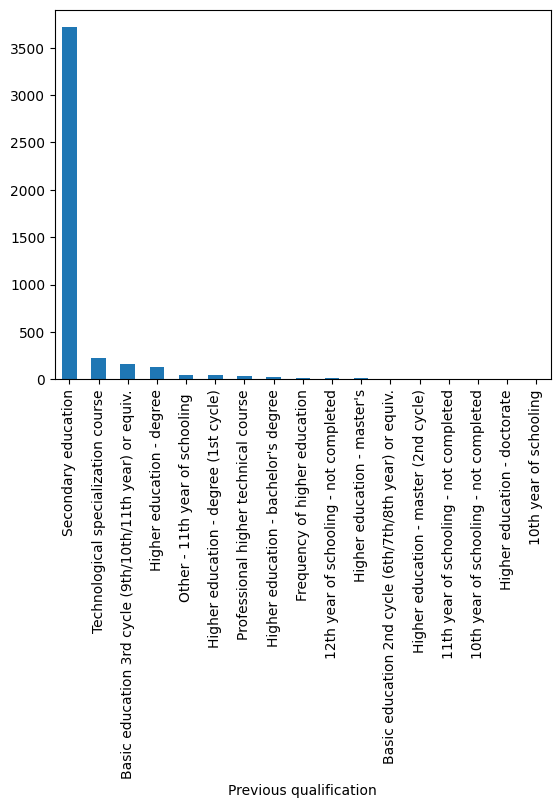

In [20]:
eda['Previous qualification'].value_counts().plot(kind = 'bar')

In [21]:
pd.crosstab(eda['Previous qualification'], eda['Marital status']).sort_values(by = 'Previous qualification', ascending= False)

Marital status,divorced,facto union,legally separated,married,single,widower
Previous qualification,,,,,,
Technological specialization course,0,0,0,9,210,0
Secondary education,54,14,5,242,3398,4
Professional higher technical course,0,0,0,2,34,0
Other - 11th year of schooling,4,0,1,15,25,0
Higher education - master's,0,0,0,0,8,0
Higher education - master (2nd cycle),0,0,0,2,4,0
Higher education - doctorate,0,0,0,0,1,0
Higher education - degree (1st cycle),3,2,0,0,35,0
Higher education - degree,4,4,0,32,86,0


In [22]:
pd.crosstab(eda['Previous qualification'], eda['Target']).sort_values(by = 'Previous qualification', ascending= False)

Target,Dropout,Enrolled,Graduate
Previous qualification,,,
Technological specialization course,69,55,95
Secondary education,1078,698,1941
Professional higher technical course,6,8,22
Other - 11th year of schooling,26,6,13
Higher education - master's,4,1,3
Higher education - master (2nd cycle),2,0,4
Higher education - doctorate,1,0,0
Higher education - degree (1st cycle),14,6,20
Higher education - degree,75,4,47


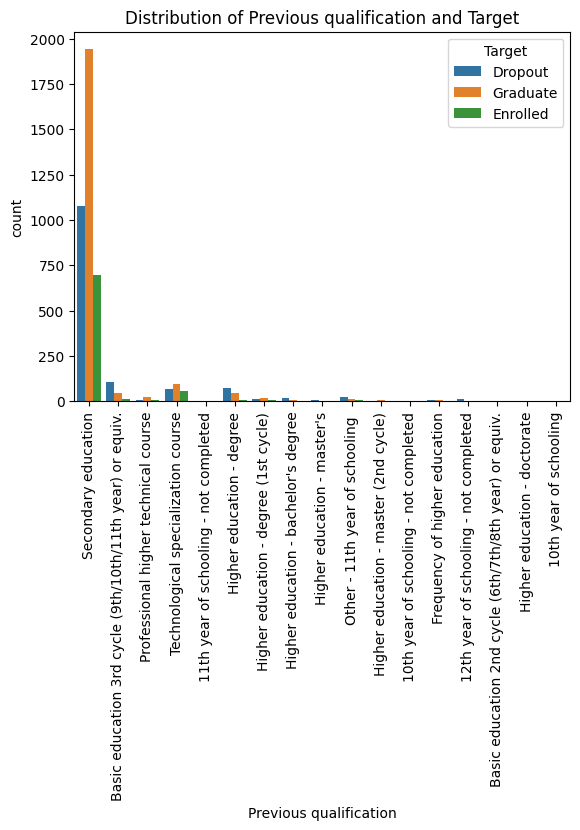

In [23]:
sns.countplot(data=eda, x='Previous qualification', hue='Target')
plt.xticks(rotation=90)
plt.title('Distribution of Previous qualification and Target')
plt.show()


* The majority of students have completed secondary education.
* Among students with secondary education:
  * Dropout: 1078 students
  * Enrolled: 698 students
  * Gaduate: 1941 students
* Moreover, most students with secondary education are single.

In [24]:
def nationality(i):
    if i == 1:
        return 'Portuguese'
    if i ==2:
        return 'German'
    if i == 6:
        return 'Spanish'
    if i == 11:
        return 'Italian'
    if i == 13:
        return 'Dutch'
    if i == 14:
        return 'English'
    if i == 17:
        return 'Lithuanian'
    if i == 21:
        return 'Angolan'
    if i == 22:
        return 'Cape Verdean'
    if i == 24:
        return 'Guinean' 
    if i ==25:
        return 'Mozambican'
    if i == 26:
        return 'Santomean'
    if i ==32:
        return 'Turkish'
    if i == 41:
        return 'Brazilian'
    if i == 62:
        return'Romanian'
    if i == 100:
        return 'Moldova (Republic of)'
    if i == 101:
        return 'Mexican'
    if i == 103:
        return 'Ukrainian'
    if i ==105:
        return 'Russian'
    if i == 108:
        return 'Cuban'
    if i == 109:
        return 'Colombian'
eda['Nationality'] = eda['Nationality'].apply(nationality)

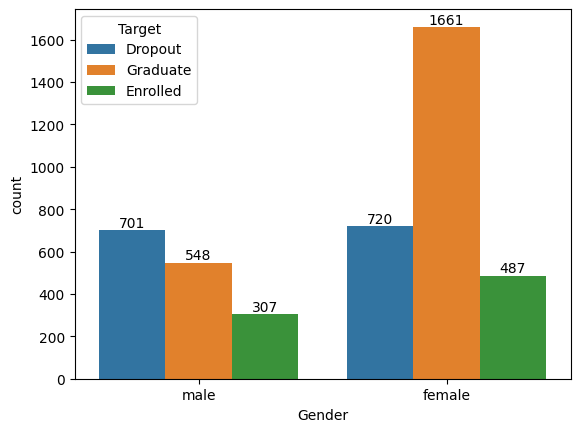

In [25]:
s = sns.countplot(data = eda, x = 'Gender',hue = 'Target' )
for i in s.containers:
    s.bar_label(i)

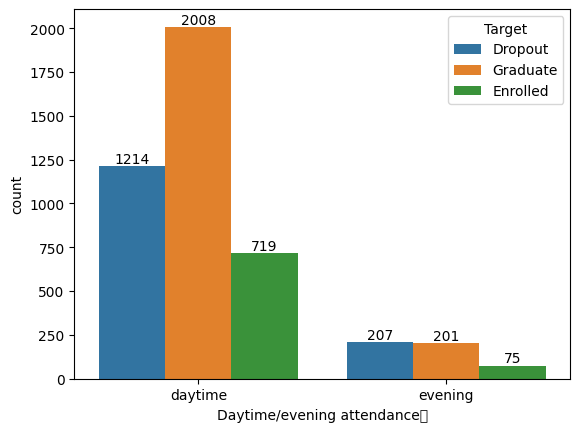

In [26]:
s = sns.countplot(data = eda, x = 'Daytime/evening attendance\t',hue = 'Target' )
for i in s.containers:
    s.bar_label(i)
plt.show()

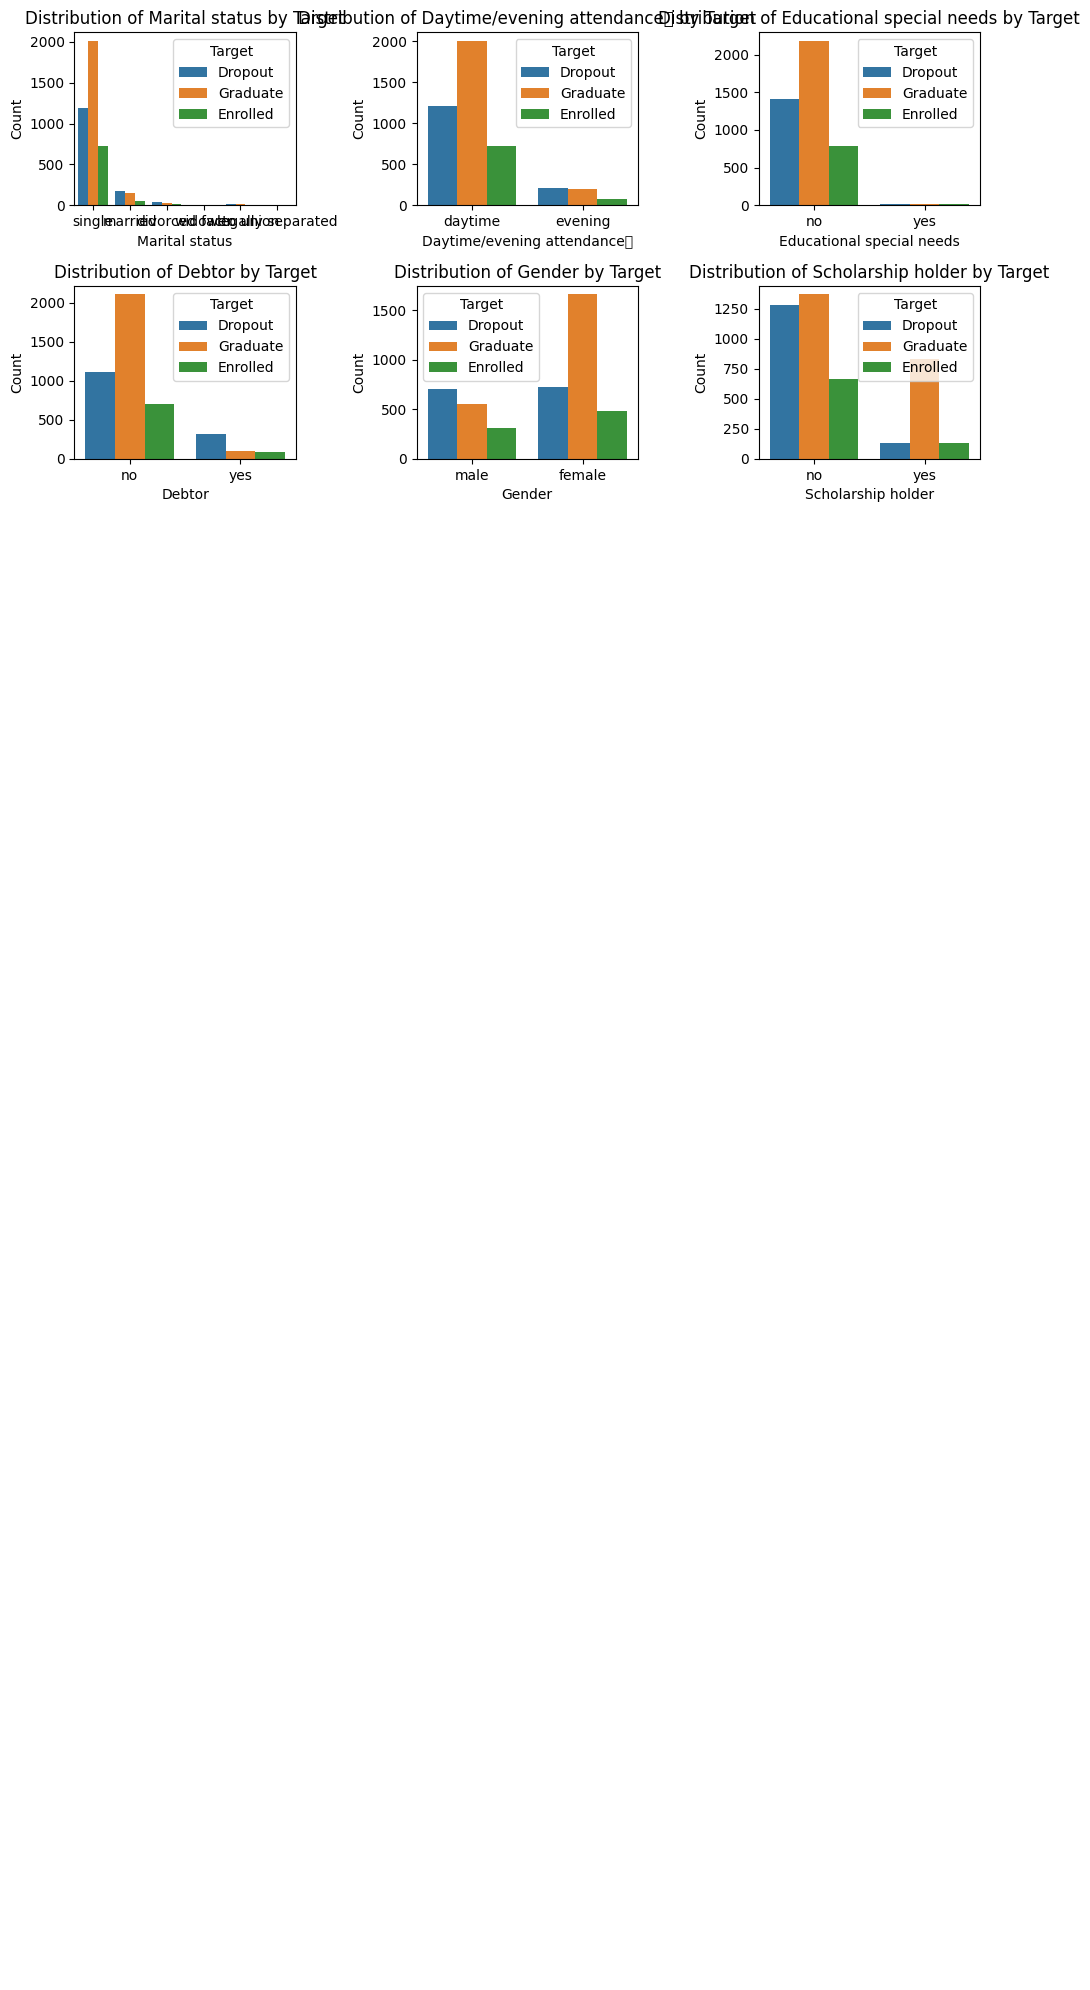

In [28]:
include = ['Marital status', 'Daytime/evening attendance\t', 'Educational special needs', 'Debtor', 'Gender', 'Scholarship holder']
target_column = 'Target'
fig, axes = plt.subplots(8, 3, figsize=(10, 20))
axes = axes.flatten()
for i, col in enumerate(include):
    sns.countplot(data=eda, x=col, hue=target_column, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by {target_column}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title=target_column)

for ax in axes[len(include):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

<Axes: >

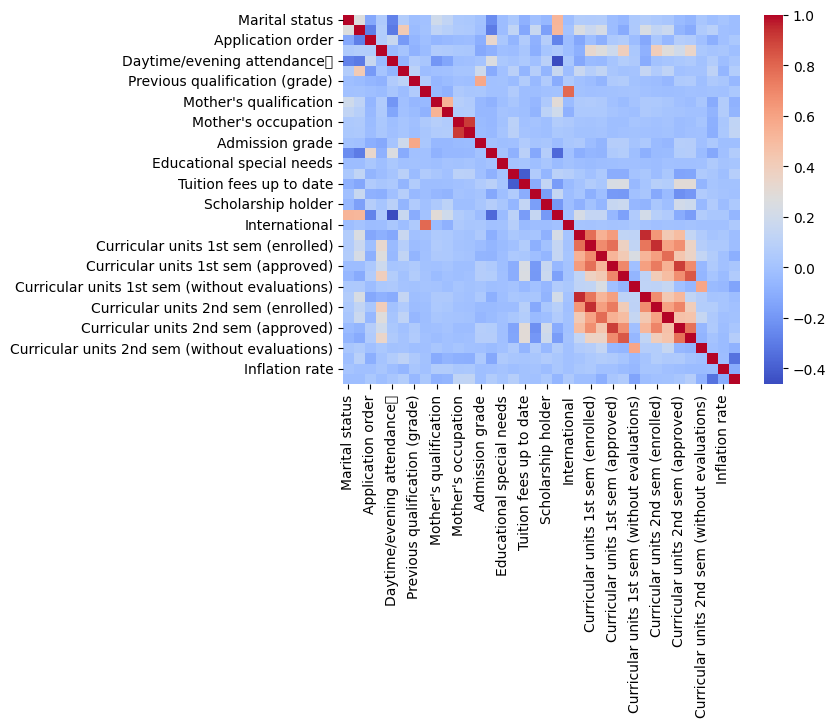

In [29]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

In [30]:
df1 = df.drop(['Nationality', 'Mother\'s occupation', 'Father\'s qualification',
          'Curricular units 1st sem (credited)',
          'Curricular units 1st sem (enrolled)',
          'Curricular units 1st sem (evaluations)',
          'Curricular units 1st sem (without evaluations)',
          'Curricular units 1st sem (approved)',
          'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (credited)',
          'Curricular units 2nd sem (enrolled)',
          'Curricular units 2nd sem (evaluations)',
          'Curricular units 2nd sem (without evaluations)',
          'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (grade)', 'Inflation rate', 'GDP',
           'Unemployment rate'], axis = 1, inplace = True)

<Axes: >

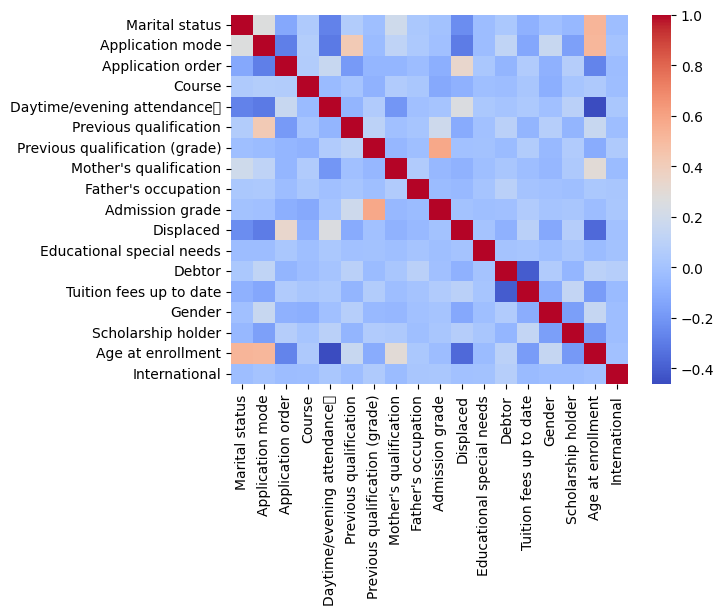

In [32]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

In [ ]:
#DATA PREPROCESSING

In [78]:
df = pd.read_csv(r"C:\Users\india\Downloads\data.csv", delimiter=';')

In [79]:
X = df.drop('Target', axis = 1)

In [80]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [81]:
y = df['Target']

In [82]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [83]:
X_train.shape

(3539, 36)

In [84]:
X_test.shape

(885, 36)

In [85]:
k_value=[]
Train_accuracy =[]
Test_accuracy =[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i,p=1)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    k_value.append(i)
    Train_accuracy.append(accuracy_score(y_train,y_pred_train))
    Test_accuracy.append(accuracy_score(y_test,y_pred))
print("K values: " , k_value)
print("Train accuracy: ", Train_accuracy)
print("Test accuracy: ", Test_accuracy)

K values:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Train accuracy:  [1.0, 0.8315908448714326, 0.8041819723085617, 0.7863803334275219, 0.7657530375812376, 0.7479513987001978, 0.7391918621079401, 0.7332579824809268, 0.729584628426109, 0.7267589714608647, 0.7259112743712913, 0.7146086465103136, 0.7106527267589715, 0.7109352924554959, 0.7044362814354337, 0.7050014128284826, 0.7038711500423849, 0.7066968070076293, 0.7018931901667138]
Test accuracy:  [0.6056497175141243, 0.5819209039548022, 0.6508474576271186, 0.6282485875706215, 0.6587570621468927, 0.6485875706214689, 0.6531073446327683, 0.6519774011299435, 0.6463276836158192, 0.6406779661016949, 0.6440677966101694, 0.6519774011299435, 0.6451977401129944, 0.6463276836158192, 0.6485875706214689, 0.6372881355932203, 0.6338983050847458, 0.6418079096045197, 0.6361581920903955]


<Axes: xlabel='K'>

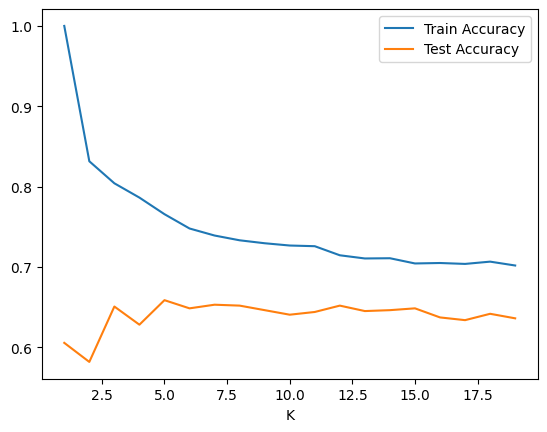

In [86]:
Accuracy = pd.DataFrame({'K':k_value,'Train Accuracy':Train_accuracy,'Test Accuracy':Test_accuracy})
Accuracy.plot.line(x='K',y=['Train Accuracy','Test Accuracy'])

In [87]:
Accuracy

,K,Train Accuracy,Test Accuracy
0,1,1.000000,0.605650
1,2,0.831591,0.581921
2,3,0.804182,0.650847
3,4,0.786380,0.628249
4,5,0.765753,0.658757
5,6,0.747951,0.648588
6,7,0.739192,0.653107
7,8,0.733258,0.651977
8,9,0.729585,0.646328
9,10,0.726759,0.640678


In [88]:
k_value = []
value_acc = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors= i, p = 1)
    knn.fit(X_train, y_train)
    k_fold = KFold(n_splits=3, random_state=14, shuffle=True)
    k_value.append(i)
    value_acc.append(cross_val_score(knn,X,y,cv= k_fold,scoring='accuracy').mean())

In [89]:
Accuracy_val = pd.DataFrame({'K Value':k_value,'Value Accuracy':value_acc})

In [90]:
Accuracy_val

,K Value,Value Accuracy
0,1,0.605336
1,2,0.580019
2,3,0.649866
3,4,0.641500
4,5,0.651898
5,6,0.651445
6,7,0.656644
7,8,0.662296
8,9,0.665462
9,10,0.664332


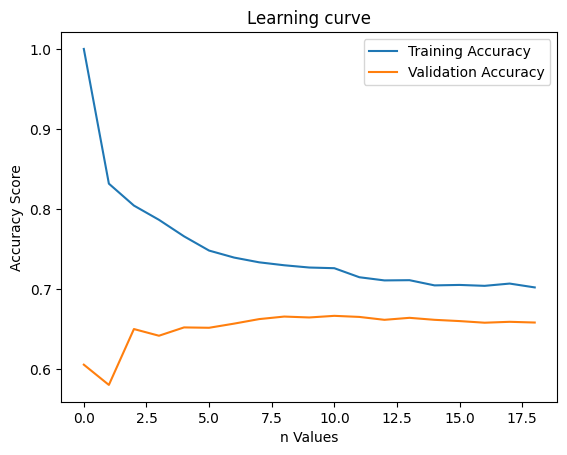

In [91]:
plt.plot(Train_accuracy, label = 'Training Accuracy')
plt.plot(value_acc, label = 'Validation Accuracy')
plt.xlabel('n Values')
plt.ylabel('Accuracy Score')
plt.title('Learning curve')
plt.legend();

In [92]:
print("Accuracy score:", accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average="weighted"))
print("Recall Score:", recall_score(y_test,y_pred,average='weighted'))
print("F1 Score:", f1_score(y_test,y_pred,average='weighted'))

Accuracy score: 0.6361581920903955
Precision Score: 0.6220509516780702
Recall Score: 0.6361581920903955
F1 Score: 0.6032657797614659
